In [ ]:
# Download the data csv file from https://drive.google.com/file/d/1QLvpwOV9VJL98BBSYSe1TYUuIxw7i9kH
# Read about the dataset here https://samyzaf.com/ML/song_year/song_year.html
# (we will use a reduced version of the dataset)

# Upload the file using colab upload functions
from google.colab import files
uploaded = files.upload()

Saving YearPredictionMSD.csv to YearPredictionMSD.csv


## **SPLIT AND NORMALIZE DATA**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the data from the file
data = pd.read_csv('YearPredictionMSD.csv')
X = data.to_numpy()[:,1:]
Y = data.to_numpy()[:,0]

print('Data size: ', X.shape)
print('Output size: ', Y.shape)

# Validation data set
X_train_and_val, X_test, Y_train_and_val, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=5)

# SCALE DATA
scaler = StandardScaler()

# Fit and transform the training and validation data
X_train_and_val = scaler.fit_transform(X_train_and_val)

# Transform the test data
X_test = scaler.transform(X_test)

# Further split training and validation data
X_train, X_val, Y_train, Y_val = train_test_split(X_train_and_val, Y_train_and_val, test_size = 0.1, random_state=5)

X_train_70, X_train_30, Y_train_70, Y_train_30 = train_test_split(X_train, Y_train, test_size = 0.3, random_state=5)

print('Training Data size: ', X_train.shape)
print('Training Output size: ', Y_train.shape)
print('Validation Data size: ', X_val.shape)
print('Validation Output size: ', Y_val.shape)
print('Test Data size: ', X_test.shape)
print('Test Output size: ', Y_test.shape)


Data size:  (50000, 90)
Output size:  (50000,)
Training Data size:  (40500, 90)
Training Output size:  (40500,)
Validation Data size:  (4500, 90)
Validation Output size:  (4500,)
Test Data size:  (5000, 90)
Test Output size:  (5000,)


# **RELATION VIEW**

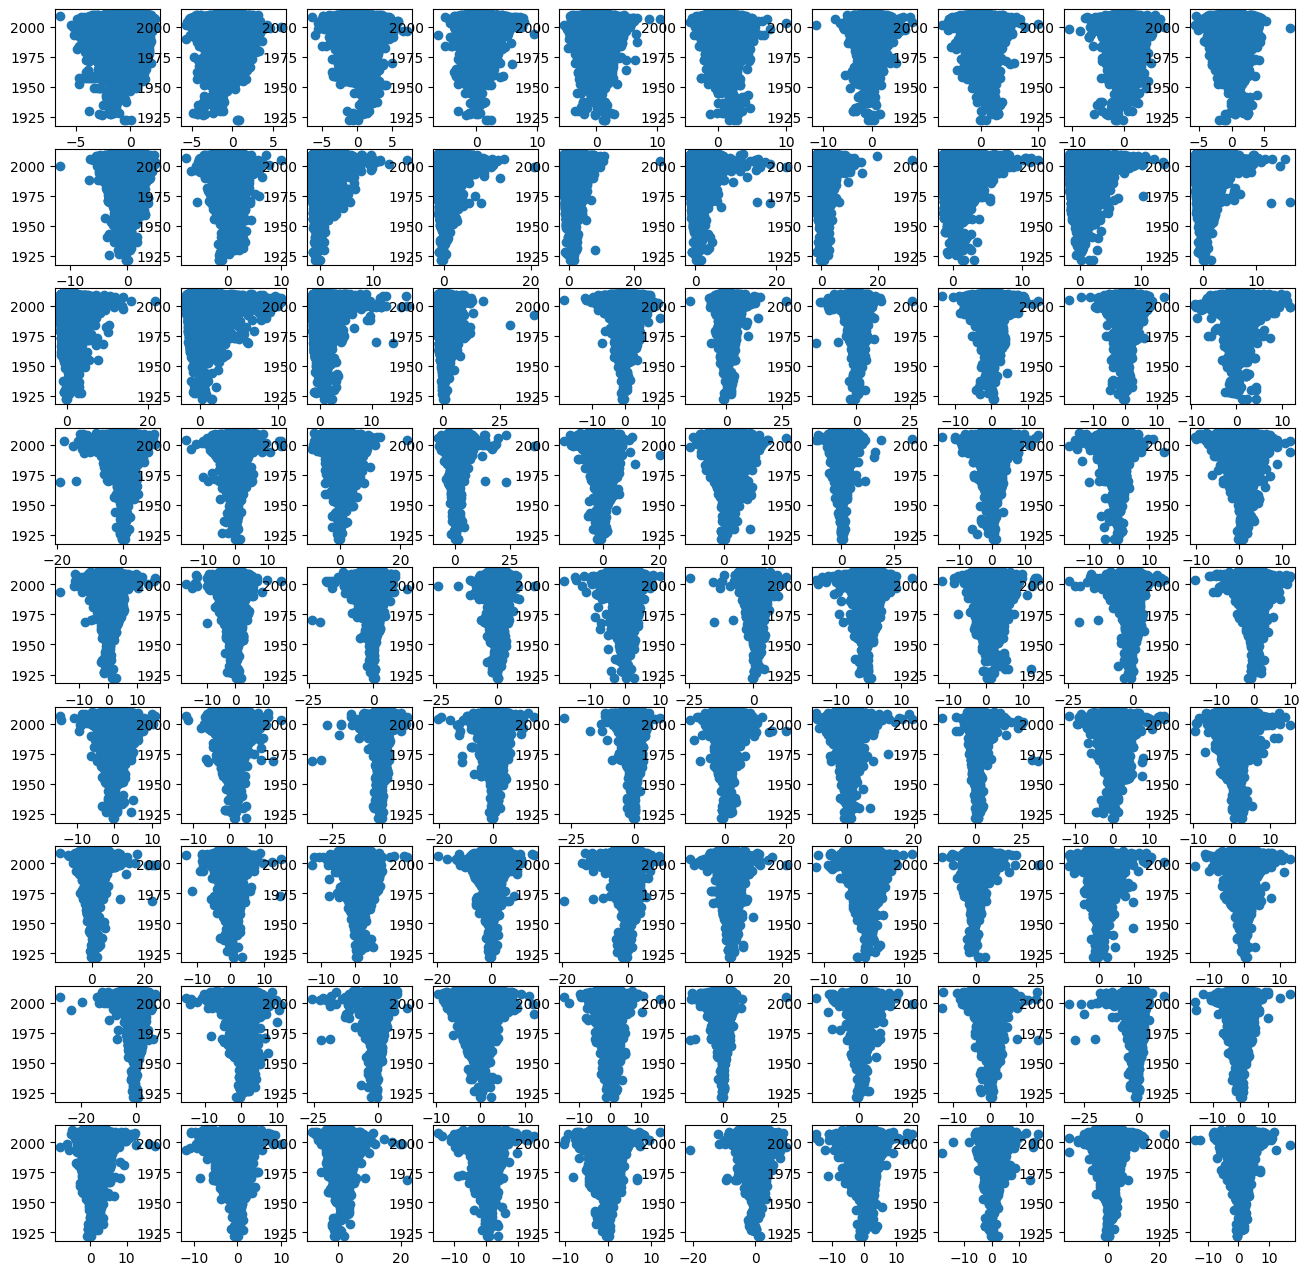

In [ ]:
# inspect the data: visualize relations between each dimension of the feature vector and the output
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 16))
for i in range(90):
  plt.subplot(9, 10, i+1)
  plt.scatter(X_train[:,i],Y_train)

 First of all, we must take into account that, according to the dataset information, as the year is closer to 2011 there are more songs in our dataset, while in years closer to 1922 there are less songs:

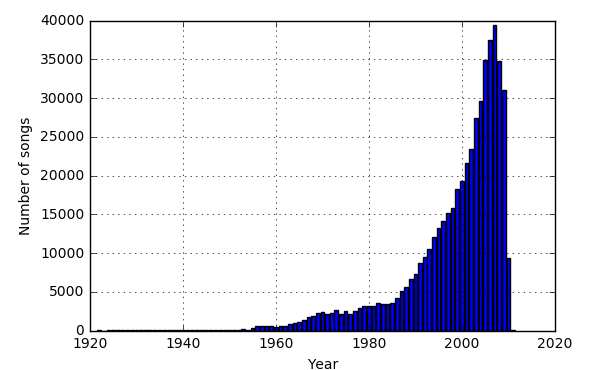   

To understand our graphs, let's first look at how our data is set up. We have 50,000 songs from one specific year. Each song has 90 numbers that tell us the value of each feature for that song.

Now, when we look at the graphs, we notice something interesting. There are more points around the year 2011. But in almost all the graphs, the scores are spread out to the right and left. This means that the scores don't change mainly because of the year, but because we have more data.

So, this might make it hard to predict things based on these scores, because they seem to act independently of the year.

# **CORRELATION**

In [ ]:
import numpy as np

# inspect the data: compute correlation coefficient between each dimension of the feature vector and the output
for i in range(90):
  corr, _ = np.corrcoef(X_train[:,i],Y_train)
  print(corr)

[1.         0.21206402]
[1.         0.03746939]
[ 1.         -0.13219719]
[1.00000000e+00 7.39480697e-04]
[1.         0.02340623]
[ 1.         -0.17525826]
[1.         0.10198479]
[ 1.         -0.03927365]
[ 1.         -0.02346983]
[1.         0.03709142]
[1.         0.02384356]
[ 1.        -0.0751283]
[1.         0.03196677]
[1.         0.08452676]
[ 1.00000000e+00 -9.08337077e-04]
[1.         0.03867509]
[1.        0.0423675]
[1.         0.02858877]
[1.         0.01124755]
[1.         0.09073675]
[ 1.         -0.04936294]
[1.         0.05456481]
[1.         0.04515813]
[ 1.        -0.0538918]
[1.         0.06411642]
[ 1.         -0.01203126]
[ 1.         -0.00446374]
[ 1.         -0.00140894]
[1.         0.05384693]
[1.         0.01159442]
[ 1.         -0.06249708]
[1.        0.0268341]
[ 1.         -0.08330583]
[1.         0.03814691]
[ 1.         -0.03692268]
[ 1.         -0.09573767]
[ 1.         -0.03668992]
[1.         0.06663172]
[1.         0.07353046]
[ 1.         -0.12337288

This values can be between -1 and 1: where -1 indicates a perfect negative correlation, 0 indicates no correlation, and 1 indicates a perfect positive correlation.

All the values are close to zero, this suggests, how we were predicting before, that there is no linear relationship between the features and the output. That correlation measures only linear relationships, so the non linear relationship is not captured here.

To continue, let's test different machine learning methods:

# **MODELS CHECK**

### LINEAR REGRESSION

In [ ]:
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import linear_model

# Fit a linear regression model
lr = linear_model.LinearRegression()
lr.fit(X_train_and_val, Y_train_and_val)

# Create custom scoring functions for cross-validation (negative mean squared error and R^2)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

# Evaluate the model using cross-validation with both scoring metrics
cv_scores = cross_validate(lr, X_train_and_val, Y_train_and_val, cv=5, scoring=('r2', 'neg_mean_squared_error'))

print(f'Average R^2 score: {np.mean(cv_scores["test_r2"])}')
print(f'Average MSE score: {-1 * np.mean(cv_scores["test_neg_mean_squared_error"])}')
# Print the model coefficients
lr.fit(X_train_and_val, Y_train_and_val)
print('Model coefficients: ', lr.coef_)

Average R^2 score: 0.21373824840040126
Average MSE score: 89.46042506072533
Model coefficients:  [ 4.88650497e+00 -2.45256890e+00 -9.89172257e-01 -3.30215992e-01
 -2.20025558e-01 -2.64079045e+00  1.95698126e-03 -8.70254897e-01
 -6.13172034e-01  2.68003253e-01 -6.69630997e-01  8.91022282e-02
  9.96568520e-01  6.29056298e-01 -4.84331681e-01  7.57226001e-01
  1.84392431e-01  1.28745982e+00  6.13306160e-01  7.78780167e-01
 -1.75795001e-01 -7.88888908e-02  1.45948205e+00  1.91649684e-01
 -4.23694226e-01  7.18233118e-02  7.62972660e-01 -7.37126368e-03
 -1.04458303e-01 -1.16986832e-01 -6.98699248e-02 -1.12661185e-01
 -1.28084433e-01  2.47419587e-01  1.94925679e-01 -5.39978292e-01
 -1.41545079e-01  3.01345006e-01  3.66138204e-01 -3.88796555e-01
 -4.22080818e-01 -1.46448076e-01 -1.58001442e-01 -8.41590019e-03
 -5.46847152e-02  3.24472759e-01  2.24499017e-01 -3.40080666e-01
  1.82284281e-01  2.25356817e-01  8.91178365e-02 -1.53263256e-01
  2.46879294e-01 -3.58890419e-02  4.64231532e-02  1.406966

Knowing in advance that the dataset can be difficult to model, and analysing the metrics. This simple model approximates the behaviour of the data with slight precission.

MSE is highly influenced by high errors. Taking into account that the output can be between 0 and 89, the maximum MSE value could be in the range of ((89/2)^2) = 1980.25 (because if we try to make random predictions, the average of our error would be by around half of the total range). In this way, 89 seems to be a good value. This data suggest that the average error of the model would is 9.43 years (sqrt(89)). Knowing that the maximun could be 44.5 making random predictions, linear regression solution could be a good model.

R2 score and explained variance score variables are essentially the same thing. A score of 1.0 would indicate a perfect fit, meaning that the model perfectly predicts the target variable based on the features. 0.2172 means that the linear model explains about 21.72 percent of the variance in the validation data. This suggests a low level of success in explaining the variability in the validation data.

In [ ]:
# Fit a Polinomial model

from sklearn.preprocessing import PolynomialFeatures

# Transform feature vectors
max_degree = 2
poly = PolynomialFeatures(max_degree)
X_poly = poly.fit_transform(X_train_and_val)

# Fit a linear regression model
lrpol = linear_model.LinearRegression()
lrpol.fit(X_poly, Y_train_and_val)

# Create custom scoring functions for cross-validation (negative mean squared error and R^2)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

# Evaluate the model using cross-validation with both scoring metrics
cv_scores = cross_validate(lrpol, X_poly, Y_train_and_val, cv=5, scoring=('r2', 'neg_mean_squared_error'))

print(f'Average R^2 score: {np.mean(cv_scores["test_r2"])}')
print(f'Average MSE score: {-1 * np.mean(cv_scores["test_neg_mean_squared_error"])}')
print('Model coefficients: ', lrpol.coef_)

Average R^2 score: -0.0934339308520606
Average MSE score: 124.49825524700279
Model coefficients:  [ 5.59179682e+09  6.09867994e+00 -3.08750692e+00 ... -3.19464716e-02
  9.05267082e-02 -9.35671360e-03]


Polinomial test much worse results than linear. We get a average of error of 11.5 years (sqrt(124.5)) and the R^2 score is even negative.

R^2 score range is from 0 to 1. If the R² score is negative, it means that the model is performing worse than a model that predicts the mean value of the target variable for all observations. This suggests that the polinomial model is a poor fit for the data. It might be making predictions that are significantly worse than the linear regression approach.

## LASSO

In [ ]:
# Fit a Lasso model

alphas = [0.15, 0.5, 1]

lasso = linear_model.Lasso()

# Find the best alpha using GridSearchCV
parameters = {'alpha': alphas}

lasso_search = GridSearchCV(lasso, parameters, cv=5, scoring={'mse': mse_scorer, 'r2': r2_scorer}, refit='mse')
lasso_result = lasso_search.fit(X_train_and_val, Y_train_and_val)

best_alpha = lasso_result.best_params_['alpha']

# Evaluate the model using cross-validation with both scoring metrics
cv_scores = cross_validate(lasso_result.best_estimator_, X_train_and_val, Y_train_and_val, cv=5, scoring=('r2', 'neg_mean_squared_error'))

print(f'Best alpha: {best_alpha}')
print(f'Average R^2 score: {np.mean(cv_scores["test_r2"])}')
print(f'Average MSE score: {-1 * np.mean(cv_scores["test_neg_mean_squared_error"])}')

# Get the coefficients
best_estimator = lasso_result.best_estimator_
coefficients = best_estimator.coef_

print(coefficients)

Best alpha: 0.15
Average R^2 score: 0.19816668912882435
Average MSE score: 91.22563306821242
[ 4.10740075 -1.72520556 -1.18420909 -0.         -0.         -2.0653861
  0.         -0.20858242 -0.22993327  0.         -0.31493228 -0.
  0.659268    0.48768016 -0.          0.55004248  0.11752421  0.26754349
  0.49911805  0.8145182   0.          0.          0.86766129  0.
 -0.03408391  0.          0.34830059 -0.         -0.         -0.
 -0.         -0.         -0.07362533  0.          0.         -0.31511223
 -0.          0.24137114  0.21347937 -0.2681138  -0.49675876 -0.
 -0.05978376 -0.         -0.          0.          0.11414383 -0.
 -0.          0.          0.         -0.          0.         -0.
  0.          0.         -0.51722492  0.10959824 -0.34125686 -0.
 -0.         -0.05200983 -0.          0.11521533 -0.         -0.
 -0.         -0.         -0.11904983 -0.         -0.05390865  0.
  0.14956789  0.17493866  0.04622097  0.          0.         -0.37470551
  0.         -0.          0.   

The Lasso method in machine learning is a technique used to select important features from a larger set of variables. The method helps the model focus on the most relevant information and ignore less important factors. This is really useful when there are a lot of potential features, and you want to figure out which ones are actually influential in making predictions.

Lasso model includes a hyperparameter which has to be set manually: lamda. This penalty term encourages the model to use fewer variables, effectively pushing some of them towards zero. To search the best value, we will have to make some cross-validation, testing some values of lamda using the validation data. To do this task we can use the function GridSearchCV, a function from sklearn used for evaluating models with different hyperparameters in order to find the best ones. In concrete, we have tested these alphas: 0.15, 0.5, 1.

According to these experiments we can conclude that the best lamda is 0,15, the closest to zero. With this lamda the MSE and R^2 score metrics are just a little worst than with linear regression.

In [ ]:
# Fit a Polinomial model

# Transform feature vectors
max_degree = 2
poly = PolynomialFeatures(max_degree)
X_poly = poly.fit_transform(X_train_70)

# Fit a linear regression model
lasso_pol = linear_model.Lasso(best_alpha, max_iter=1000)
lasso_pol.fit(X_poly, Y_train_70)

# Create custom scoring functions for cross-validation (negative mean squared error and R^2)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

# Evaluate the model using cross-validation with both scoring metrics
cv_scores = cross_validate(lasso_pol, X_poly, Y_train_70, cv=2, scoring=('r2', 'neg_mean_squared_error'))

print(f'Average R^2 score: {np.mean(cv_scores["test_r2"])}')
print(f'Average MSE score: {-1 * np.mean(cv_scores["test_neg_mean_squared_error"])}')
print('Model coefficients: ', lasso_pol.coef_)

Average R^2 score: 0.09252973645100304
Average MSE score: 103.43701180261445
Model coefficients:  [ 0.          1.70436639 -0.         ...  0.00834273  0.
  0.        ]


## RIDGE

In [ ]:
# Fit a Ridge model

alphas = [0.05, 0.15, 0.3, 0.5, 0.75, 0.9]

ridge = linear_model.Ridge()

# Find the best alpha using GridSearchCV
parameters = {'alpha': alphas}

ridge_search = GridSearchCV(ridge, parameters, cv=5, scoring={'mse': mse_scorer, 'r2': r2_scorer}, refit='r2')
ridge_result = ridge_search.fit(X_train_and_val, Y_train_and_val)

best_alpha = ridge_result.best_params_['alpha']

# Evaluate the model using cross-validation with both scoring metrics
cv_scores = cross_validate(ridge_result.best_estimator_, X_train_and_val, Y_train_and_val, cv=5, scoring=('r2', 'neg_mean_squared_error'))

print(f'Best alpha: {best_alpha}')
print(f'Average R^2 score: {np.mean(cv_scores["test_r2"])}')
print(f'Average MSE score: {-1 * np.mean(cv_scores["test_neg_mean_squared_error"])}')

# Get the coefficients
best_estimator = ridge_result.best_estimator_
coefficients = best_estimator.coef_

print(coefficients)

Best alpha: 0.9
Average R^2 score: 0.21373872122229556
Average MSE score: 89.46037073123249
[ 4.88614795e+00 -2.45229181e+00 -9.89124958e-01 -3.30371410e-01
 -2.19969397e-01 -2.64048888e+00  2.08243090e-03 -8.70166490e-01
 -6.13093036e-01  2.68015383e-01 -6.69410819e-01  8.89996040e-02
  9.96493180e-01  6.29022496e-01 -4.84319128e-01  7.57268256e-01
  1.84411534e-01  1.28724074e+00  6.13284349e-01  7.78770329e-01
 -1.75759268e-01 -7.88254239e-02  1.45929798e+00  1.91637218e-01
 -4.23611302e-01  7.18100076e-02  7.62917567e-01 -7.39426731e-03
 -1.04439405e-01 -1.16966768e-01 -6.98829452e-02 -1.12651497e-01
 -1.28112823e-01  2.47412845e-01  1.94878617e-01 -5.39947302e-01
 -1.41529326e-01  3.01354663e-01  3.66156400e-01 -3.88780818e-01
 -4.22091291e-01 -1.46449805e-01 -1.58014362e-01 -8.41452579e-03
 -5.46944214e-02  3.24430880e-01  2.24506575e-01 -3.40034024e-01
  1.82241295e-01  2.25340481e-01  8.91230296e-02 -1.53255929e-01
  2.46860542e-01 -3.58973155e-02  4.64205925e-02  1.40694032e-0

While Ridge adds a penalty term based on the squared values of the coefficients Lasso adds a penalty term based on the absolute values of the coefficients. In this way, Ridge tends to shrink the coefficients towards zero, but rarely fully eliminates them. Therefore, ridge also will need cross-validation for choosing a good alpha parameter.

Through these experiments we can conclude that with alpha = 0.9 (the biggest alpha) results the same MSE and R^2 as than in the linear regression experiment. The have to understand that, as the alpha gets bigger, the model becomes similar to the linear regression, so we can conclude that the linear regression is still the best model.

In [ ]:
# Fit a Polinomial model

# Transform feature vectors
max_degree = 2
poly = PolynomialFeatures(max_degree)
X_poly = poly.fit_transform(X_train_70)

# Fit a linear regression model
ridge_pol = linear_model.Ridge(alpha=best_alpha)
ridge_pol.fit(X_poly, Y_train_70)

# Create custom scoring functions for cross-validation (negative mean squared error and R^2)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

# Evaluate the model using cross-validation with both scoring metrics
cv_scores = cross_validate(ridge_pol, X_poly, Y_train_70, cv=2, scoring=('r2', 'neg_mean_squared_error'))

print(f'Average R^2 score: {np.mean(cv_scores["test_r2"])}')
print(f'Average MSE score: {-1 * np.mean(cv_scores["test_neg_mean_squared_error"])}')
print('Model coefficients: ', ridge_pol.coef_)

Average R^2 score: -3.1278980117070487
Average MSE score: 470.2453660461589
Model coefficients:  [ 0.          6.12339533 -3.00859918 ... -0.07446243  0.0361721
  0.03445804]


## HUBER

In [ ]:
# Fit a Huber model
huber = linear_model.HuberRegressor(max_iter=10000)

# Evaluate the model using cross-validation with both scoring metrics
cv_scores = cross_validate(huber, X_train_70, Y_train_70, cv=2, scoring=('r2', 'neg_mean_squared_error'))

print(f'Average R^2 score: {np.mean(cv_scores["test_r2"])}')
print(f'Average MSE score: {-1 * np.mean(cv_scores["test_neg_mean_squared_error"])}')

# Get the coefficients
huber.fit(X_train_and_val, Y_train_and_val)
coefficients = huber.coef_

print(coefficients)


Average R^2 score: 0.16989728720793623
Average MSE score: 94.62073515966391
[ 5.02858985 -3.07670468 -0.91546567 -0.39349675 -0.32360356 -1.855392
  0.01411744 -0.65892936 -0.56463508  0.30319067 -0.6639657   0.20267506
  0.82071357  0.65305398 -0.10051424  0.49507504  0.07192839  0.88787392
  0.50512718  0.5698281  -0.10671904  0.11581216  0.83265008  0.28557472
 -0.52072996  0.10659331  0.45811872  0.02734158 -0.12413713 -0.01787745
  0.03402289 -0.07398608 -0.16102874  0.25801109  0.12842133 -0.34764898
 -0.17626309  0.31245704  0.31765661 -0.21770276 -0.33785634 -0.07452129
 -0.00547367 -0.07506017 -0.00614104  0.24214002  0.10436037 -0.1969191
  0.08289013  0.07228268 -0.01544346 -0.17444305  0.25872954 -0.10731578
 -0.05306167  0.0616897  -0.52256924  0.38603579 -0.12227607 -0.05663965
 -0.12310338 -0.09913132 -0.25127185  0.36576599 -0.30752896 -0.03654989
 -0.04633973 -0.0621823  -0.32073322 -0.14267193 -0.13963038  0.07329256
  0.01831852  0.25338477  0.06628008  0.32099468  0

The Huber method tries to find a line that fits the data well, but doesn't get too affected by outliers. It does this by using a special formula that combines both the squared error (like in regular regression) and the absolute error (which is less affected by outliers). In this case this method still get worse results from validation than normal linear regression.

In [ ]:
# Fit a Polinomial model

# Transform feature vectors
max_degree = 2
poly = PolynomialFeatures(max_degree)
X_poly = poly.fit_transform(X_train_70)

# Fit a linear regression model
huber_pol = linear_model.HuberRegressor()
huber_pol.fit(X_poly, Y_train_70)

# Create custom scoring functions for cross-validation (negative mean squared error and R^2)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

# Evaluate the model using cross-validation with both scoring metrics
cv_scores = cross_validate(huber_pol, X_poly, Y_train_70, cv=2, scoring=('r2', 'neg_mean_squared_error'))

print(f'Average R^2 score: {np.mean(cv_scores["test_r2"])}')
print(f'Average MSE score: {-1 * np.mean(cv_scores["test_neg_mean_squared_error"])}')
print('Model coefficients: ', huber_pol.coef_)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Average R^2 score: -1741.563951915807
Average MSE score: 198573.03536035772
Model coefficients:  [929.40214046  32.52871913 -17.60844233 ...   3.11364105  -3.67019678
  -1.22075805]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


## RANSAC

In [ ]:
# Create a RANSAC model
ransac = linear_model.RANSACRegressor()

# Evaluate the model using cross-validation with both scoring metrics
cv_scores = cross_validate(ransac, X_train_and_val, Y_train_and_val, cv=5, scoring=('r2', 'neg_mean_squared_error'))

print(f'Average R^2 score: {np.mean(cv_scores["test_r2"])}')
print(f'Average MSE score: {-1 * np.mean(cv_scores["test_neg_mean_squared_error"])}')

# Get the coefficients
ransac.fit(X_train_and_val, Y_train_and_val)
coefficients = ransac.estimator_.coef_

print(coefficients)


Average R^2 score: -13.113074243403569
Average MSE score: 1607.290427493738
[ 10.46282486  -5.27950745  -1.51881203  -0.47609049  -0.8653586
  -8.84011419   2.99943355   0.6657961   -3.2718824   -0.80609088
  -0.6081526    4.69874455  -2.0024732   11.21161599  -2.79149927
  32.52260759  -0.55761163   4.80262153  -5.5262135   -6.6086145
 -17.84129313  10.17839686   5.35479333  -0.37744736  -7.70901086
   3.83651013  17.07001173   7.81724064   1.91912639   2.39149146
   6.24088523   2.32618509   4.18271518  -0.91440878   8.20004187
   2.82599646  -7.06105193 -10.659304     1.4312376   -2.41645962
   4.0135846    4.18814283  -2.10257595  -6.06136475   7.44061231
  -1.87927534  -0.39624537 -12.26863036  11.51370983  10.55843875
  -1.76402772   0.44795178   1.77521011  -6.24823089  -9.27576366
   6.81889422 -12.01564896   3.15669286   0.19703149   0.16695506
   0.73564597  10.48825715  -1.37577077   4.65348971  -1.83446662
   8.8477579    1.42631042   1.47492475  -6.58423785  -5.50292823
  

The RANSAC method, in general terms, uses random samples for fitting a model. According to the results, this method is not suitable for this problem.

The R^2 score is even negative, and the average error of years is 1607, close to the worst possible solution which would choose random outputs and would have an average of error of 44.5.

In [ ]:
# Fit a Polinomial model

# Transform feature vectors
max_degree = 2
poly = PolynomialFeatures(max_degree)
X_poly = poly.fit_transform(X_train_70)

# Fit a linear regression model
ransac_pol = linear_model.RANSACRegressor()
ransac_pol.fit(X_poly, Y_train_70)

# Create custom scoring functions for cross-validation (negative mean squared error and R^2)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

# Evaluate the model using cross-validation with both scoring metrics
cv_scores = cross_validate(ransac_pol, X_poly, Y_train_70, cv=2, scoring=('r2', 'neg_mean_squared_error'))

print(f'Average R^2 score: {np.mean(cv_scores["test_r2"])}')
print(f'Average MSE score: {-1 * np.mean(cv_scores["test_neg_mean_squared_error"])}')
print('Model coefficients: ', ransac_pol.coef_)


KeyboardInterrupt: ignored

## NN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Define a range of neighbors to search over
n_neighbors = [1, 2, 5, 10, 16, 25, 32]

# Create a pipeline with KNeighborsRegressor
pipe = Pipeline([
    ('knn', KNeighborsRegressor())
])

# Create a dictionary of parameters to search over
parameters = {
    'knn__n_neighbors': n_neighbors
}

# Create custom scoring functions for cross-validation (negative mean squared error and R^2)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

# Fit the GridSearchCV to the combined training and validation data
knn_search = GridSearchCV(pipe, parameters, cv=5, scoring={'mse': mse_scorer, 'r2': r2_scorer}, refit='r2')
knn_result = knn_search.fit(X_train_and_val, Y_train_and_val)

best_k = knn_result.best_params_['knn__n_neighbors']

# Evaluate the model using cross-validation with both scoring metrics
cv_scores = cross_validate(knn_result.best_estimator_, X_train_and_val, Y_train_and_val, cv=5, scoring=('r2', 'neg_mean_squared_error'))

print(f'Best k: {best_k}')
print(f'Average R^2 score: {np.mean(cv_scores["test_r2"])}')
print(f'Average MSE score: {-1 * np.mean(cv_scores["test_neg_mean_squared_error"])}')

# Get the estimator
best_estimator = knn_result.best_estimator_
knn = best_estimator.named_steps['knn']

Best k: 10
Average R^2 score: 0.23869415928330096
Average MSE score: 86.60839555555556


The NN model is a model which use the dataset itself to predict the output. Depending on the number of neighbours chosen (hyperparameter) the output will be the one provided by the average of the outputs of the nearest neighbours to the input.

With cross validation we can see that, using ten neighbours the model improve the linear regression solution result, being even better than all the other possibilities tested.

In [ ]:
# Fit a Polinomial model

# Transform feature vectors
max_degree = 2
poly = PolynomialFeatures(max_degree)
X_poly = poly.fit_transform(X_train_70)

# Fit a linear regression model
knn_pol = KNeighborsRegressor(best_k)
knn_pol.fit(X_poly, Y_train_70)

# Create custom scoring functions for cross-validation (negative mean squared error and R^2)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

# Evaluate the model using cross-validation with both scoring metrics
cv_scores = cross_validate(knn_pol, X_poly, Y_train_70, cv=2, scoring=('r2', 'neg_mean_squared_error'))

print(f'Average R^2 score: {np.mean(cv_scores["test_r2"])}')
print(f'Average MSE score: {-1 * np.mean(cv_scores["test_neg_mean_squared_error"])}')

Average R^2 score: 0.10808921315093772
Average MSE score: 101.66328042328043


# **Select the best option and use validation data**

In [ ]:
# Finally, what is the expected r2 metric in new data?
# Fit a linear model WITH THE TRAIN AND VALIDATION DATA

lr = linear_model.LinearRegression()
lr.fit(X_train_and_val, Y_train_and_val)
# Predict output for the TEST data
y_test_predicted = lr.predict(X_test)
# Compute metrics in the TEST data
mse_test = mean_squared_error(Y_test, y_test_predicted)
print('MSE (test set) linear model: {}'.format(mse_test))
r2_test = r2_score(Y_test, y_test_predicted)
print('R2 (test set) linear model: {}'.format(r2_test))


knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train_and_val, Y_train_and_val)
# Predict output for the TEST data
y_test_predicted = knn.predict(X_test)
# Compute metrics in the TEST data
mse_test = mean_squared_error(Y_test, y_test_predicted)
print('MSE (test set) linear model: {}'.format(mse_test))
r2_test = r2_score(Y_test, y_test_predicted)
print('R2 (test set) linear model: {}'.format(r2_test))

MSE (test set) linear model: 87.31107311876211
R2 (test set) linear model: 0.21431405947426785
MSE (test set) linear model: 81.600162
R2 (test set) linear model: 0.2657048214169163


Finally, like the NN model seems to be the best option for predictions in this problem, we use validation data also to get a new model using more data and we test it with the data that we reserved at the beggining for testing.

Comparing the MSE and R2 that we got in the linear regression experiment, this model seems to be slightly better thanks to the added data. In this way, this is the model that we would use for this problem.